In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv('Data/StudentsPerformance.csv')
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Let's predict the Math score will the remaining features
X = df.drop(columns=['math score'],axis=1)

In [5]:
y = df['math score']

In [6]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)


In [8]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['reading score', 'writing score'], dtype='object'))])

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [11]:
X_test

array([[ 0.        ,  0.        ,  1.        , ...,  1.        ,
         1.13775344,  1.03319389],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.26342075,  0.29192512],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.22699022,  0.22453705],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.57728377,  0.83102968],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -2.1550059 , -2.3362096 ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.8575186 ,  1.30274617]])

**Create an Evaluate function to give all metrics for model training**

In [16]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2score = r2_score(true,predicted)
    return mae,rmse,r2score

In [17]:
models = {
    "LinearRegression":LinearRegression(),
    "RidgeRegression" : Ridge(),
    'Decision Tree'   : DecisionTreeRegressor(),
    'Random Forest'   : RandomForestRegressor(),
    'XgBoost'         : XGBRegressor(),
    'SVR'             : SVR(),
    'KNN'             : KNeighborsRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'Lasso'            : Lasso(),
    'CatBoost'         : CatBoostRegressor()
}

In [23]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    ## Make Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)

    model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2)

    print('Model Performance for Training Data')
    print('Root Mean sqared Error: {:.4f}'.format(model_train_rmse))
    print('Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('R2 Score: {:.4f}'.format(model_train_r2))

    print('--------------------------------------------------------------')

    print('Model Performance for Test Data')
    print('Root Mean sqared Error: {:.4f}'.format(model_test_rmse))
    print('Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('R2 Score: {:.4f}'.format(model_test_r2))

    print('====================================================================')

    print('\n')


LinearRegression
Model Performance for Training Data
Root Mean sqared Error: 5.2972
Mean Absolute Error: 4.2383
R2 Score: 0.8743
--------------------------------------------------------------
Model Performance for Test Data
Root Mean sqared Error: 5.4825
Mean Absolute Error: 4.3379
R2 Score: 0.8778


RidgeRegression
Model Performance for Training Data
Root Mean sqared Error: 5.2977
Mean Absolute Error: 4.2371
R2 Score: 0.8743
--------------------------------------------------------------
Model Performance for Test Data
Root Mean sqared Error: 5.4814
Mean Absolute Error: 4.3365
R2 Score: 0.8779


Decision Tree
Model Performance for Training Data
Root Mean sqared Error: 0.2887
Mean Absolute Error: 0.0200
R2 Score: 0.9996
--------------------------------------------------------------
Model Performance for Test Data
Root Mean sqared Error: 7.7890
Mean Absolute Error: 6.2280
R2 Score: 0.7534


Random Forest
Model Performance for Training Data
Root Mean sqared Error: 2.2882
Mean Absolute Err

In [24]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Model Name,R2 Score
1,RidgeRegression,0.877874
0,LinearRegression,0.877824
9,CatBoost,0.853688
3,Random Forest,0.845837
7,AdaBoostRegressor,0.838412
4,XgBoost,0.834163
8,Lasso,0.820248
6,KNN,0.790165
2,Decision Tree,0.753406
5,SVR,0.712002


### Linear Regression

In [25]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print('Accuracy of the model is %.2f'%score)

Accuracy of the model is 87.78


#### Plot True and Predicted data-points

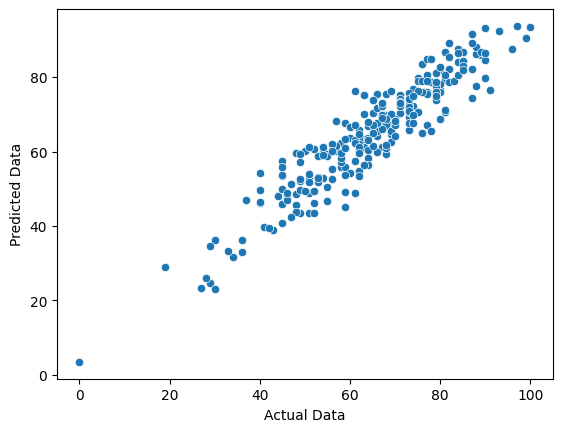

In [27]:
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()